# Project 1: Languages Spoken in the Homes of Minnesota Public School Students

# Contributors: Sam Espe, Yameena Khan, Maryam Osman, Nhan Tran (Group 7)

## Notebook 2: Data Analysis & Presentation

## Topic Overview
---

Minnesota is home to hundreds of thousands of families who speak dozens of distinct languages. Minnesota's Department of Education gathers data on the families of public school students every year, including what language students speak at home. This data is publicly available for the school years 2006-2007 to 2021-2022.

We used this data to examine the proportions of families that speak non-English languages at home, the distribution of non-English-speaking families across Minnesota, and how the most frequently spoken languages change in that time period.

## Assumptions
---



- All families in public schools provided data to the Department of Education for the applicable year(s).
- Families that speak non-English languages at home only speak one language.
- Each family has one student in the public school system.

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress

## Research Questions and Motivations
---

The members in our group all speak multiple languages. This led us to be curious about how many Minnesota families speak non-English languages, and how that has changed over time.

Sam has a background in education, and found that we could find data from the Minnesota Department of Education for each year between 2007 and 2022. Using this data, we developed the following research questions:

- How many unique languages are spoken in the homes of public school students in Minnesota between 2007 and 2022? How has the distribution of languages changed over the interval of 2007 to 2022?
- Which languages, excluding English, are the most common in Minnesota?
- How are the number of students who speak a given non-English language distributed geographically, and how does that change over time?

## Data Source
---

We used publicly available data from the Minnesota Department of Education. We found it on the Department of Education's website: [https://public.education.mn.gov/MDEAnalytics/DataTopic.jsp?TOPICID=2], under the Category "Languages".

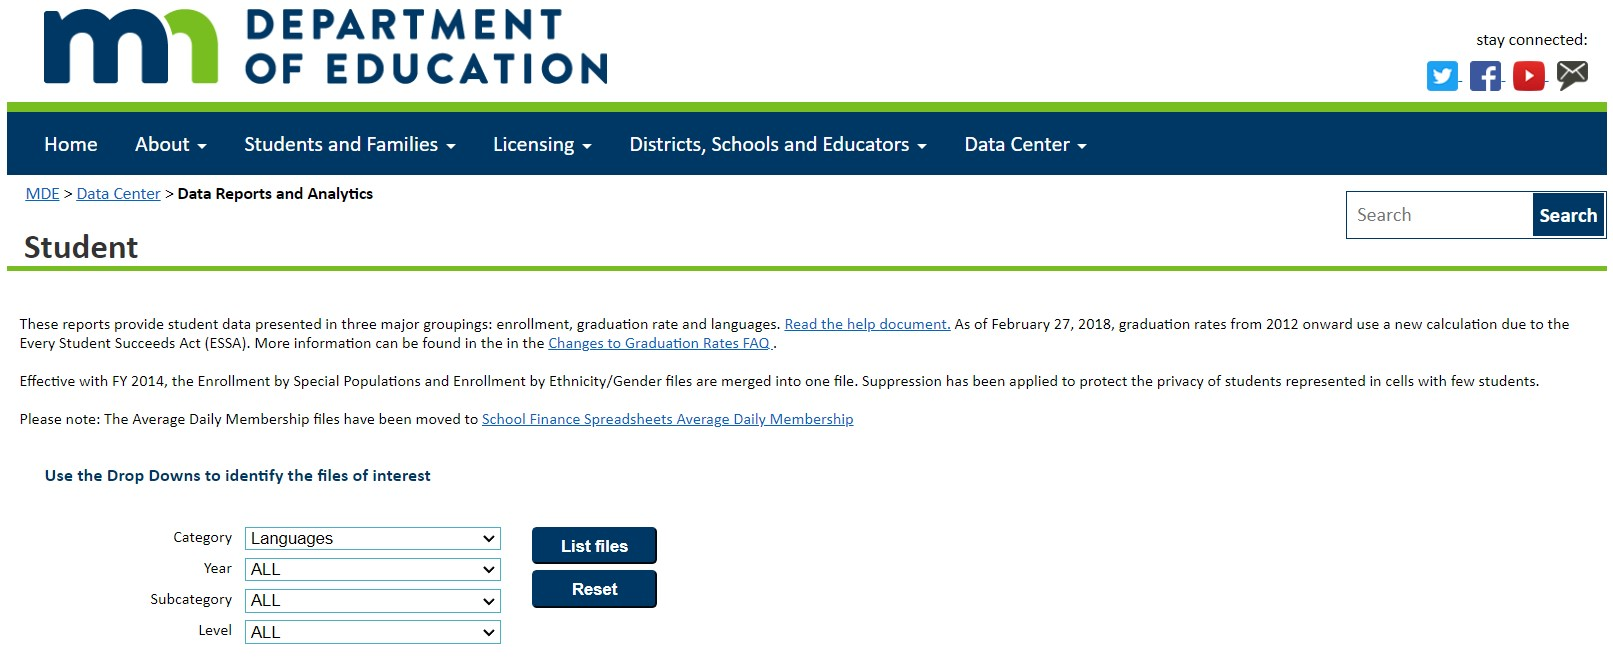

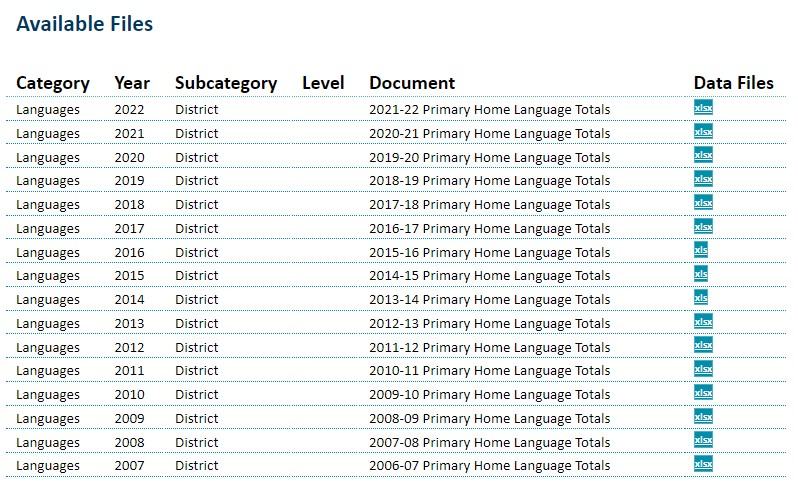

## Data Exploration & Clean-Up Process

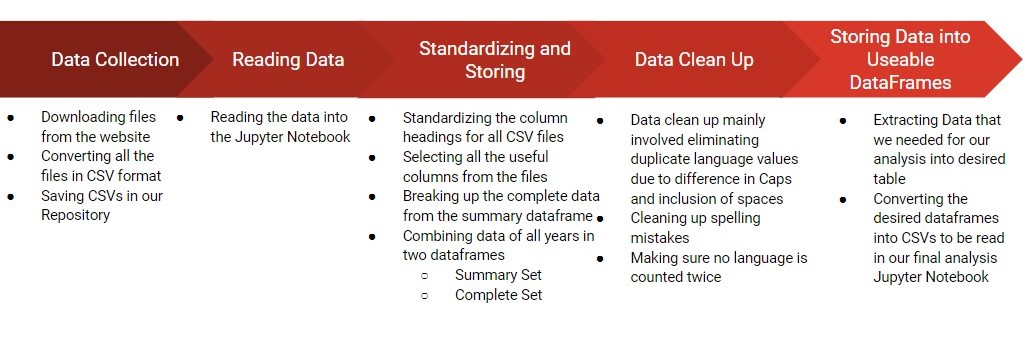

## Data Analysis Process

### Preliminary Analysis
---

#### Import CSVs from Notebook 1

In [ ]:
complete_language_summary_csv = "complete_language_summary.csv"
complete_language_summary = pd.read_csv(complete_language_summary_csv)
complete_language_summary.head()

In [ ]:
complete_primary_home_language_csv = "complete_primary_home_language.csv"
complete_primary_home_language = pd.read_csv(complete_primary_home_language_csv)
complete_primary_home_language.head()

In [ ]:
#Counting final Unique Languages
Unique_Languages_count = complete_primary_home_language["Language Name"].nunique()
print(f'There are {Unique_Languages_count} unique languages spoken across the state of Minnesota over the 2007-2022 time period.')

In [ ]:
#Unique Langs per year:
GroupbyLang = complete_primary_home_language.groupby(["School Year"])
Unique_lang_Count_peryear = GroupbyLang["Language Name"].nunique()
Unique_Lang_peryear_df = Unique_lang_Count_peryear.to_frame()
Unique_Lang_peryear_df

### Comparing the Spread of Students Speaking Non-English Languages by Area of Minnesota
---

The Minnesota Department of Education divides public school districts into "strata" based on their geographic location and enrollment. They provide 3 regions for school districts: Minneapolis and St. Paul, the 7 counties that surround the Twin Cities (not including Minneapolis and Saint Paul), and the rest of Minnesota is called "Outstate". Outstate Minnesota districts are further divided by enrollment: districts with more than 2,000 students enrolled, districts with between 1,000 and 1,999 students, districts with between 500 and 999 students, and districts with fewer than 500 students enrolled; there are 6 strata overall.

In [ ]:
lang_2007_geo = complete_primary_home_language.loc[complete_primary_home_language["School Year"] == "06-07"].groupby("Strata Name").nunique()

lang_2007_geo_final = lang_2007_geo["Language Name"]

lang_2007_geo_final

In [ ]:
lang_2022_geo = complete_primary_home_language.loc[complete_primary_home_language["School Year"] == "21-22"].groupby("Strata Name").nunique()

lang_2022_geo_final = lang_2022_geo["Language Name"]

lang_2022_geo_final

In [ ]:
# Distribution of languages by Strata
tick_marks = [1,2,3,4,5,6]

In [ ]:
# Add labels on the bars

def add_value_labels(x_labels, y_values):
    for i in range(1, len(x_labels)+1):
        plt.text(i, y_values[i-1], y_values[i-1], ha = "center")
# Code to label bars borrowed from: https://www.delftstack.com/howto/matplotlib/add-value-labels-on-matplotlib-bar-chart/

### Here, we are comparing the number of languages spoken per strata from 2007 to the languages spoken per strata from 2022.

Overall, the number of unique languages increase across all strata.

In [ ]:
# 2007

bar_2007_geo = plt.bar(tick_marks, lang_2007_geo_final)

plt.xticks(tick_marks, lang_2007_geo_final.index, rotation = "vertical")
plt.title("Languages by Strata, 2007")
plt.ylabel("Unique Languages Spoken")

add_value_labels(lang_2007_geo_final.index, lang_2007_geo_final)

plt.show()

In [ ]:
# 2022

bar_2022_geo = plt.bar(tick_marks, lang_2022_geo_final)

plt.xticks(tick_marks, lang_2022_geo_final.index, rotation = "vertical")
plt.title("Languages by Strata, 2022")
plt.ylabel("Unique Languages Spoken")

add_value_labels(lang_2022_geo_final.index, lang_2022_geo_final)

plt.show()

## Graph Number of Unique Languages Over Time for Each Strata
---

In [ ]:
groupby_strata = complete_primary_home_language.groupby(["Strata Name", "School Year"], as_index= False).nunique()

groupby_strata

In [ ]:
xaxis = [2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]

In [ ]:
seven_county_area = groupby_strata.loc[groupby_strata["Strata Name"] == "7 County Metro Area excluding MPLS/STP"].reset_index(drop = True)
seven_county_area_scatter_data = seven_county_area["Language Name"]

msp = groupby_strata.loc[groupby_strata["Strata Name"] == "Minneapolis and Saint Paul"].reset_index(drop = True)
msp_scatter_data = msp["Language Name"]

outstate_2k = groupby_strata.loc[groupby_strata["Strata Name"] == "Outstate - Enrollment 2000 or more"].reset_index(drop = True)
outstate_2k_scatter_data = outstate_2k["Language Name"]

outstate_1k = groupby_strata.loc[groupby_strata["Strata Name"] == "Outstate - Enrollment between 1000 and 1999"].reset_index(drop = True)
outstate_1k_scatter_data = outstate_1k["Language Name"]

outstate_500 = groupby_strata.loc[groupby_strata["Strata Name"] == "Outstate - Enrollment between 500 and 999"].reset_index(drop = True)
outstate_500_scatter_data = outstate_500["Language Name"]

outstate_under_500 = groupby_strata.loc[groupby_strata["Strata Name"] == "Outstate - Enrollment less than 500"].reset_index(drop = True)
outstate_under_500_scatter_data = outstate_under_500["Language Name"]

In [ ]:
# Create a line plot of all districts over time on one graph

plt.scatter(xaxis, msp_scatter_data, color = "r", marker = "v")
plt.scatter(xaxis, seven_county_area_scatter_data, color = "b", marker = "s")
plt.scatter(xaxis, outstate_2k_scatter_data, color = "g", marker = "p")
plt.scatter(xaxis, outstate_1k_scatter_data, color = "c", marker = "X")
plt.scatter(xaxis, outstate_500_scatter_data, color = "m", marker = "o")
plt.scatter(xaxis, outstate_under_500_scatter_data, color = "y", marker = "D")

plt.title("Number of Unique Languages Spoken for Each Strata Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Unique Languages Spoken")
plt.legend(["Minneapolis & Saint Paul", "7 County Metro", "Outstate MN > 2000", "Outstate MN 1000-1999", "Outstate MN 500-999", "Outstate MN < 500"])

plt.rcParams["figure.figsize"] = (9.2, 6.325)

plt.show()

## Graphing the top 15 languages statewide for 2007 and 2022
---

In [ ]:
#2007

langs_2007 = complete_language_summary.loc[complete_language_summary["School Year"] == "06-07"]

# Find index of English line(s), remove them
eng_2007_index = langs_2007.loc[langs_2007["Language Name"] == "ENGLISH"].index

langs_2007.drop(eng_2007_index, inplace = True)

langs_2007

In [ ]:
# Find the top 15 non-English languages

langs_2007_sort = langs_2007.sort_values(by=["Student Count"], ascending = False)

langs_2007_top15 = langs_2007_sort.head(15)

langs_2007_top15.reset_index(inplace = True)

langs_2007_top15

In [ ]:
def add_value_labels1(x_labels, y_values):
    for i in range(0, len(x_labels)):
        plt.text(i, y_values[i], y_values[i], ha = "center")

In [ ]:
# Make a bar chart of the top 15 non-English languages

lang_ticks = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14]

plt.bar(lang_ticks, langs_2007_top15["Student Count"])
plt.title("Top 15 Non-English Languages, 2007")
plt.xticks(langs_2007_top15.index, langs_2007_top15["Language Name"], rotation = 45)
plt.ylabel("Students Speaking Each Language")
plt.xlabel("Language")

add_value_labels1(langs_2007_top15["Language Name"], langs_2007_top15["Student Count"])

plt.show()

In [ ]:
# Compare number of English-speaking homes and non-English-speaking homes

non_english_2007 = langs_2007["Student Count"].sum()

eng_2007 = complete_language_summary.loc[complete_language_summary["School Year"] == "06-07"]

eng_sum_2007 = eng_2007.loc[eng_2007["Language Name"] == "ENGLISH"]["Student Count"].sum()

In [ ]:
eng_ne_2007 = []

eng_ne_2007.append(non_english_2007)
eng_ne_2007.append(eng_sum_2007)
ne_labels = ["Non-English Languages", "English"]

plt.pie(eng_ne_2007, labels = ne_labels, autopct='%.2f%%')
plt.title("Proportion of Students Speaking English at Home, 2007")

plt.show()

In [ ]:
# 2022

langs_2022 = complete_language_summary.loc[complete_language_summary["School Year"] == "21-22"]

# Find index of English line(s), remove them
eng_2022_index = langs_2022.loc[langs_2022["Language Name"] == "ENGLISH"].index

langs_2022.drop(eng_2022_index, inplace = True)

langs_2022

In [ ]:
# Find the top 15 non-English languages

langs_2022_sort = langs_2022.sort_values(by=["Student Count"], ascending = False)
langs_2022_top15 = langs_2022_sort.head(15)

langs_2022_top15.reset_index(inplace = True)

langs_2022_top15

In [ ]:
# Make a bar chart of the top 15 non-English languages

plt.bar(lang_ticks, langs_2022_top15["Student Count"])
plt.title("Top 15 Non-English Languages, 2022")
plt.xticks(langs_2022_top15.index, langs_2022_top15["Language Name"], rotation = 45)
plt.ylabel("Number of Students Speaking Language at Home")
plt.xlabel("Language")

add_value_labels1(langs_2022_top15["Language Name"], langs_2022_top15["Student Count"])

plt.show()

In [ ]:
# Compare number of English-speaking students and non-English-speaking students

non_english_2022 = langs_2022["Student Count"].sum()

eng_2022 = complete_language_summary.loc[complete_language_summary["School Year"] == "21-22"]

eng_sum_2022 = eng_2022.loc[eng_2022["Language Name"] == "ENGLISH"]["Student Count"].sum()

In [ ]:
# Make a pie chart comparing English-speaking and non-English speaking students

eng_ne_2022 = []

eng_ne_2022.append(non_english_2022)
eng_ne_2022.append(eng_sum_2022)
ne_labels = ["Non-English Languages", "English"]

plt.pie(eng_ne_2022, labels = ne_labels, autopct='%.2f%%')
plt.title("Proportion of Students Speaking English at Home, 2022")

plt.show()

## Statistical Testing: Hypothesis Test and Linear Regression
---

**Hypothesis**

Our hypothesis is that Minneapolis & Saint Paul, the 7-county metro area (excluding Minneapolis & Saint Paul), and outstate Minnesota have different mean number of students that speak non-English languages from 2007 to 2022.

**Linear Regression**

We decided to create a linear regression on the proportion of families that speak non-English languages, to see how that proportion changes over time. We used this linear regression to predict the proportion of non-English-speaking families in the years 2025 and 2030.

## Hypothesis Test
---

Our hypothesis is that the mean number of students speaking any given non-English language in a school district over time differs between regions.

Our null hypothesis (H<sub>0</sub>) is that the mean number of students speaking any given non-English language in a public school district over time is the same across regions.

We performed a one-way ANOVA test to see whether we reject or fail to reject the null hypothesis. We performed the ANOVA test on the three regions (Minneapolis & Saint Paul, the 7-county metro area, and outstate Minnesota) against each other. We also performed the test on each combination of regions, to see if there is any similarity between any of the regions.

In [ ]:
eng_index = complete_primary_home_language[complete_primary_home_language["Language Name"] == "ENGLISH"].index
complete_primary_home_language_without_english = complete_primary_home_language.drop(eng_index, inplace = False)
complete_primary_home_language_without_english

In [ ]:
# Grouping all outstate stratas into one strata
complete_primary_home_language_without_english.loc[complete_primary_home_language_without_english["Strata Name"] == "Outstate - Enrollment 2000 or more", "Strata Name"] = "All Outstate Strata"
complete_primary_home_language_without_english.loc[complete_primary_home_language_without_english["Strata Name"] == "Outstate - Enrollment between 1000 and 1999", "Strata Name"] = "All Outstate Strata"
complete_primary_home_language_without_english.loc[complete_primary_home_language_without_english["Strata Name"] == "Outstate - Enrollment between 500 and 999", "Strata Name"] = "All Outstate Strata"
complete_primary_home_language_without_english.loc[complete_primary_home_language_without_english["Strata Name"] == "Outstate - Enrollment less than 500", "Strata Name"] = "All Outstate Strata"

In [ ]:
# One way ANOVA hypothesis test
strata_dict = {"MSP" : [], "7 County Metro" : [], "Outstate" : []}
strata_dict["7 County Metro"] = complete_primary_home_language_without_english.loc[complete_primary_home_language_without_english["Strata Name"] == "7 County Metro Area excluding MPLS/STP"]["Student Count"].tolist()
strata_dict["Outstate"] = complete_primary_home_language_without_english.loc[complete_primary_home_language_without_english["Strata Name"] == "All Outstate Strata"]["Student Count"].tolist()
strata_dict["MSP"] = complete_primary_home_language_without_english.loc[complete_primary_home_language_without_english["Strata Name"] == "Minneapolis and Saint Paul"]["Student Count"].tolist()
strata_dict

#### One-way ANOVA test comparing school districts in Minneapolis & Saint Paul (MSP), the 7-county metro area (7 County Metro), and outstate Minnesota (Outstate). 

The resulting p-value is 6.879x10^-272. Being much less than 0.05, we reject the null hypothesis.

In [ ]:
st.f_oneway(strata_dict["MSP"],strata_dict["7 County Metro"],strata_dict["Outstate"])

#### One-way ANOVA test comparing school districts in the 7-county metro area to school districts in outstate Minnesota

The resulting p-value is 1.464x10^-15. Being much less than 0.05, we reject the null hypothesis.

In [ ]:
st.f_oneway(strata_dict["7 County Metro"],strata_dict["Outstate"])

#### One-way ANOVA test comparing Minneapolis & Saint Paul school districts to districts in outstate Minnesota

The resulting p-value is 8.351x10^-126. Being much less than 0.05, we reject the null hypothesis.

In [ ]:
st.f_oneway(strata_dict["MSP"],strata_dict["Outstate"])

#### One-way ANOVA test comparing school districts in the 7-county metro area with Minneapolis & Saint Paul school districts

The resulting p-value is 6.993x10^-182. Being much less than 0.05, we reject the null hypothesis.

In [ ]:
st.f_oneway(strata_dict["7 County Metro"],strata_dict["MSP"])

#### Box plots comparing the number of students who speak any given non-English language in a district by region

This first image shows box plots that display the number of students who speak any given non-English language at home in a given district. In this plot, the boxes are too small to see clearly, and you can see the number and distribution of the fliers. There are many fliers because there are relatively few languages that have many hundreds or thousands of students speaking it at home, compared to the many languages that have ony a few students speaking it at home. 

The second image is zoomed in, showing only points where there are 50 or fewer students speaking a particular language in a district. Here, you can actually see the boxes. The medians here are very low, because there are many languages where only a handful of students (or fewer) speak a particular language at home. 

In [ ]:
fig, ax = plt.subplots()
ax.boxplot(strata_dict.values(),flierprops={'marker': 'o', 'markersize': 13, 'markerfacecolor': 'fuchsia'})
ax.set_ylim(0,11000)
ax.set_xticklabels(strata_dict.keys())
ax.set_ylabel("Number of Students that speaka any given non-English language")
ax.set_title("Boxplots for each strata")
ax.set_xlabel("Strata")
plt.show()

In [ ]:
fig, ax = plt.subplots()
ax.boxplot(strata_dict.values(),flierprops={'marker': 'o', 'markersize': 13, 'markerfacecolor': 'fuchsia'})
ax.set_ylim(0,50)
ax.set_xticklabels(strata_dict.keys())
ax.set_ylabel("Number of Students that speak any given non-English language")
ax.set_title("Boxplots for each strata")
ax.set_xlabel("Strata")
plt.show()

## Linear Regression to Predict Proportion of Households that Speak Non-English Languages¶
---

In [ ]:
#Using groupby to calculate number of students per school year per language
GroupbyLang = complete_primary_home_language.groupby(["School Year","Language Name"], as_index=False)
Unique_lang_df = GroupbyLang["Student Count"].sum()
Unique_lang_df

In [ ]:
# Grouping the school years together and finding the sum of students for each year
groupby_yearly_total = Unique_lang_df.groupby("School Year", as_index = False).sum()
groupby_yearly_total

In [ ]:
# Dropping English speakers and make a new dataframe
english_index = Unique_lang_df[Unique_lang_df["Language Name"] == "ENGLISH"].index
unique_lang_without_english = Unique_lang_df.drop(english_index, inplace = False)

# Combining all the non-english languages into one category and finding the yearly total number of speakers
combined_non_english_df = unique_lang_without_english.groupby("School Year", as_index = False).agg({"Language Name": "-".join, "Student Count" : "sum" }).rename(columns = {"Language Name" : "Combined Non-English Languages"})
combined_non_english_df 

In [ ]:
# Finding the yearly proportion of non-English speakers
non_english_proportion_df = combined_non_english_df["Student Count"]/groupby_yearly_total["Student Count"]
non_english_proportion_df

In [ ]:
# Finding r value and p value
year_arr = np.array(groupby_yearly_total["School Year"])
placeholder = np.arange(0,len(groupby_yearly_total))
tick_locations = []
for i in placeholder:
    tick_locations.append(i)
proportion_arr = np.array(non_english_proportion_df)
correlation = st.pearsonr(placeholder  ,proportion_arr)
correlation

In [ ]:
# Calculating the regression equation 
x_values = placeholder
y_values = proportion_arr
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept 
line_eq = f' y = {round(slope,5)} x + {round(intercept,5)}'

In [ ]:
# Plot
plt.scatter(x_values, y_values, marker = "o", s = 30, color = "orangered", label = "Proportion of non-English speakers" )
plt.plot(x_values,regress_values,"green")
plt.xticks(tick_locations, year_arr, rotation = 45)
plt.annotate(line_eq, (6,0.12), fontsize = 15, color = "green")
plt.title("Yearly data of proportion of non-English speakers (2007-2022)")
plt.xlabel("School Year")
plt.ylabel("Proportion of non-English speakers ")
plt.legend(loc = "best")
plt.show()

#### Calculate predicted value of proportion of non-English-speaking households for 2025 and 2030

In [ ]:
# 2025

#The equation for the linear regression is: y = 0.00451*x + 0.10519'

# 2025 would be the 19th year of data 
prediction_2025 = round((0.00451*19) + 0.10519, 5)

prediction_2025_per = prediction_2025*100

print(f'We predict that in 2025, the proportion of households speaking languages other than English across the state of Minnesota will be {prediction_2025} ({prediction_2025_per}%). ')

In [ ]:
#2030

#The equation for the linear regression is: y = 0.00451*x + 0.10519'

# 2030 would be the 24th year of data
prediction_2030 = round((0.00451*24) + 0.10519, 5)

prediction_2030_per = prediction_2030*100

print(f'We predict that in 2030, the proportion of households speaking languages other than English across the state of Minnesota will be {prediction_2030} ({prediction_2030_per}%). ')

## Conclusions
---

#### Hypothesis Test Conclusions:

The p-values generated by our ANOVA tests lead us to reject the null hypothesis (that the mean number of students speaking a particular non-English language in a public school district is the same across regions over time). This supports our hypothesis that the mean number of students speaking a given non-English language in a public school district across regions over time is different.

#### Linear Regression Conclusions:

The linear regression revealed an increasing linear trend in the proportion of households in Minnesota that speak non-English languages. We used this regression to predict how the proportions may look in 2025 and 2030, assuming that the trend does not change over time. We predict that in 2025, about 19% of Minnesota households will speak non-English languages at home, and by 2030, that proportion will be about 21%.

### Limitations/Caveats to our Conclusions

In order to compare data, we had to combine some languages together. We are not linguists. We did our best to group things together, based on brief Google searches.

## Lessons Learned
---

We learned that "fill-in-the-blank" data can be difficult to work with. The Department of Education has families write in the language they speak at home. 

One problem we ran into is that there were spelling errors in the data provided, such as "Ukrainian" being listed as "Ukranian" in at least one instance. 

Also, because the data is "fill-in-the-blank", different families described their language differently, even if they spoke the same language. For example, some families wrote that they spoke Mandarin or Cantonese, but others simply wrote that they spoke "Chinese". Because it is impossible to tell if those families spoke Mandarin Chinese or Cantonese Chinese, we were forced to group Mandarin and Cantonese together, even though they are very different languages.

Additionally, in some years, similar languages or dialects were grouped together, and in other years they were listed separately. To address this, we had to group the separately-listed languages so we could compare the data across years.

We learned that splitting up and grouping languages is hard. We aren't linguists, so determining what languages or dialects are close enough to group, and which ones should remain separate was difficult. We used Google as a resource to make these determinations, but as non-experts, we may have made mistakes (either missing languages that should have been grouped, or grouping languages that should not have been grouped). It was difficult to determine what counts as a language, and what is a dialect of said language, as well as where to group a creole language.

## Things We Would Do Differently Next Time
---

One thing we would do differently next time would be to use functions to make the data cleaning and exploration process easier. For example, writing a function for the masking process (fixing spelling errors and grouping similar languages/dialects together) would have made our code more concise. Creating a function to generate the graphs that show the top 15 languages by year would have made that process faster and easier.